# Esercitazione 9

**29 Aprile 2024**

*Gradiente e gradiente coniugato*

# Esercizio 1
Implementare la funzione **steepestdescent(A,b,x0,itmax,tol)** che implementa il metodo di discesa più ripida del gradiente per risolvere il sistema lineare Ax=b, con A matrice simmetrica e definita positiva. La funzione prende in input:
- A: matrice dei coefficienti
- b: termine noto
- x0: vettore iniziale della stessa dimensione di b
- itmax: iterazioni massime oltre le quali il metodo si ferma
- toll: tolleranza per il criterio di arresto

e restituisce in output:
- il vettore soluzione
- un vettore di tante componenti quanto il numero di iterazioni effettuate, contenente $ \frac{||r^{(k)}||_2} {||b||_2}$  iterazione per iterazione

- un array contenente le soluzioni ad ogni iterazione
- il numero di iterazioni impiegate per calcolare la soluzione con la tolleranza richiesta

Usare come criterio di arresto $ \frac{||r^{(k)}||_2} {||b||_2} < toll$

# APPUNTI:
## PARTE 1:
- Nel caso in cui A è simmetrica e definita positiva, allora Ax=b  <-->  x* = argmin(F(x)) per x appartenente ad R^n
- F(x) = (1/2) * x^T * A * x - b*x^T
- r^0 = A*x^0 - b
- p^0 = -r^0
    - while ...
        - x^(k+1) = x^k + alfa^k * p^k
        - p^k = -r^k
        - alfa^k = -<r^k, p^k>/<A*p^k, p^k> = (r^k)^T * p^k / ((p^k)^T * A * p^k)
        - r^(k+1) = r^k + alfa^k * A * p^k
- Errore relativo dato da:
    - ||A*x^k - b||2 / ||b||2
    - Perchè vogliamo fare in modo che il valore di Ax deve essere più vicino possibile a b.

## PARTE 2:
Per stampare il grafico della funzione, considero F(x1,x2) = (1/2) * [x1,x2]*A*[[x1],[x2]] - [b1,b2]*[[x1],[x2]]
- X,Y = np.meshgrid(x,y) --> discretizziamo la base
- plt.contour(X,Y,Z)
- levels = F(x^k)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def steepestDescent(A,b,x0,itmax,toll):
    
    # Inizializzazione:
    n,m = A.shape
    if n != m:
        print("La matrice non è quadrata!")
        return None, None, None, None
    x = x0
    r = A@x - b
    p = -r
    it = 0
    nb = np.linalg.norm(b)
    criterio_arresto = np.linalg.norm(r)/nb
    
    # Memorizziamo tutti gli r che calcoliamo:
    vec_r = []
    vec_r.append(criterio_arresto)
    
    # Memorizziamo i vettori soluzione di ogni iterazione:
    vec_sol = []
    vec_sol.append(x)
    
    # Parte ciclica del metodo:
    while criterio_arresto >= tol and it < itmax:
        it = it + 1
        # variabile di appoggio per calcolare il prodotto A*p:
        Ap = A@p
        # Calcolo il numeratore della formula per calcolare alfa:
        numeratore_alfa = -r.T@p
        alfa = numeratore_alfa/(p.T@Ap)
        x = x + alfa*p
        
        vec_sol.append(x)
        
        r = r + alfa*Ap
        criterio_arresto = np.linalg.norm(r)/nb
        
        vec_r.append(criterio_arresto)
        
        p = -r
        
    return x, vec_r, vec_sol, it

Soluzioni:
 [[-2.]
 [ 6.]]
Iterazioni:
 83


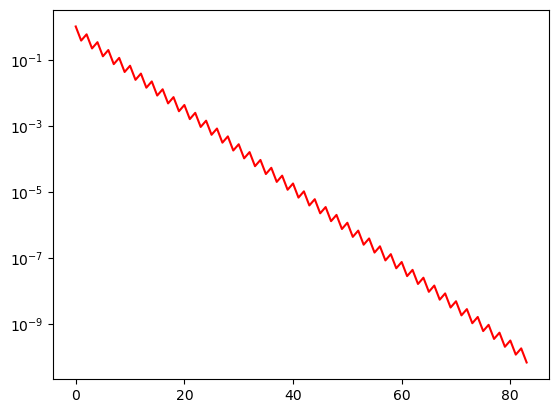

In [3]:
A = np.array([[8,4],[4,3]])
b = np.array([[8],[10]])
x0 = np.zeros_like(b)
itmax = 200
tol = 1e-10

xG, vec_rG, vec_solG, itG = steepestDescent(A,b,x0,itmax,tol)
print("Soluzioni:\n",xG)
print("Iterazioni:\n",itG)

# Stampo l'andamento delle soluzioni:
plt.semilogy(np.arange(itG + 1), vec_rG, 'r')

In [4]:
# DEFINIZIONE DELLA FUNZIONE DA RAPPRESENTARE:
def f(x,A,b):
    Ax = A@x
    xTAx = x.T@Ax
    bTx = b.T@x
    return 0.5*xTAx - bTx

In [5]:
# DEFINIZIONE DEI PUNTI DEL GRAFICO
x = np.linspace(-7.0, 3.0, 100)
y = np.linspace(-5.0, 14.0, 100)

X,Y = np.meshgrid(x,y)
Z = np.zeros_like(X)

for i in range(len(y)):
    for j in range(len(x)):
        x_coord = X[i][j]
        y_coord = Y[i][j]
        punto = np.array([[x_coord], [y_coord]])
        Z[i][j] = f(punto, A, b)

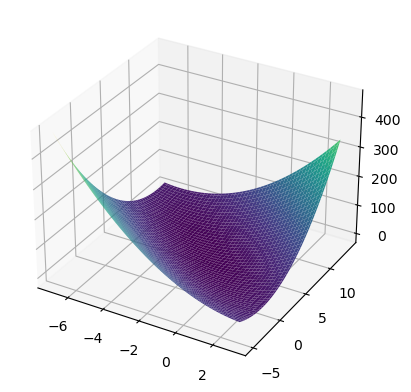

In [6]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.plot_surface(X,Y,Z, cmap = plt.cm.viridis)

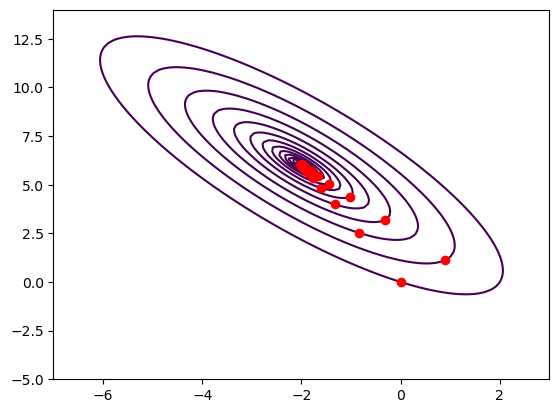

In [10]:
xCL, vec_rCL, vec_solCL, itCL = steepestDescent_CL(A,b,x0,X,Y,Z,f,itmax,tol)

# ------------------------------------------------------------------------------------------------------------------------

## Esercizio 1-Bis
Implementare la funzione **steepestdescent_CL(A,b,x0,itmax,X,Y,Z,tol)** da utilizzare solo nel caso n=2 che visualizza anche le curve di livello e l'iterato x_k.

N.B: f(x) è il funzionale quadratico da minimizzare (f(x)= <Ax,x>-<b,x>) ,
X,Y sono la discretizzazione del piano su cui costruire Z (ottenuta valutando f sui punti della griglia)

In [8]:
def steepestDescent_CL(A,b,x0,X,Y,Z,f,itmax,toll):
    
    n,m = A.shape
    if n != m:
        print("La matrice non è quadrata!")
        return None, None, None, None
    
    x = x0
    
    # DISEGNO DELLE CURVE DI LIVELLO AD OGNI ITERAZIONE:
    plt.contour(X,Y,Z, levels = f(x,A,b).flatten())
    plt.plot(x[0],x[1], 'ro')
    
    r = A@x - b
    p = -r
    it = 0
    nb = np.linalg.norm(b)
    criterio_arresto = np.linalg.norm(r)/nb
    
    # Memorizziamo tutti gli r che calcoliamo:
    vec_r = []
    vec_r.append(criterio_arresto)
    
    # Memorizziamo i vettori soluzione di ogni iterazione:
    vec_sol = []
    vec_sol.append(x)
    
    # Parte ciclica del metodo:
    while criterio_arresto >= tol and it < itmax:
        it = it + 1
        # variabile di appoggio per calcolare il prodotto A*p:
        Ap = A@p
        # Calcolo il numeratore della formula per calcolare alfa:
        numeratore_alfa = -r.T@p
        alfa = numeratore_alfa/(p.T@Ap)
        x = x + alfa*p
        
        # DISEGNO DELLE CURVE DI LIVELLO AD OGNI ITERAZIONE:
        plt.contour(X,Y,Z, levels = f(x,A,b).flatten())
        plt.plot(x[0],x[1], 'ro')
        
        vec_sol.append(x)
        
        r = r + alfa*Ap
        criterio_arresto = np.linalg.norm(r)/nb
        
        vec_r.append(criterio_arresto)
        
        p = -r
        
    return x, vec_r, vec_sol, it

# ------------------------------------------------------------------------------------------------------------------------

## Esercizio 2
Implementare la funzione **conjugate_gradient(A,b,x0,itmax,tol)** che implementa il metodo del gradiente coniugato per risolvere il sistema lineare Ax=b, con A matrice simmetrica e definita positiva. La funzione prende in input:
- A: matrice dei coefficienti
- b: termine noto
- x0: vettore iniziale della stessa dimensione di b
- itmax: iterazioni massime oltre le quali il metodo si ferma
- toll: tolleranza per il criterio di arresto

e restituisce in output:
- il vettore soluzione
- un vettore di tante componenti quanto il numero di iterazioni effettuate, contenente $ \frac{||r^{(k)}||_2} {||b||_2}$ iterazione per iterazione
- un array contenente le soluzioni ad ogni iterazione
- il numero di iterazioni impiegate per calcolare la soluzione con la tolleranza richiesta

Usare come criterio di arresto $ \frac{||r^{(k)}||_2} {||b||_2} < toll$

# APPUNTI:
- Cambia solamente il valore con cui si calcola p^k:
    - p^(k+1) = -r^(k+1) + gamma^(k+1) * p^k
    - gamma^(k+1) = r^((k+1)*T)@r^(k+1) / r^(k*T)@r^k

In [11]:
def conjugate_gradient(A,b,x0,itmax,tol):
    
    n,m = A.shape
    if n != m:
        print("La matrice non è quadrata!")
        return None, None, None, None
    
    x = x0
    
    r_old = A@x - b
    # Il p0 rimane uguale al metodo precedente:
    p = -r_old
    it = 0
    nb = np.linalg.norm(b)
    criterio_arresto = np.linalg.norm(r_old)/nb
    
    # Memorizziamo tutti gli r che calcoliamo:
    vec_r = []
    vec_r.append(criterio_arresto)
    
    # Memorizziamo i vettori soluzione di ogni iterazione:
    vec_sol = []
    vec_sol.append(x)
    
    # Parte ciclica del metodo:
    while criterio_arresto >= tol and it < itmax:
        it = it + 1
        # variabile di appoggio per calcolare il prodotto A*p:
        Ap = A@p
        # Calcolo il numeratore della formula per calcolare alfa:
        numeratore_alfa = -r_old.T@p
        alfa = numeratore_alfa/(p.T@Ap)
        x = x + alfa*p
        
        vec_sol.append(x)
        
        r = r_old + alfa*Ap
        criterio_arresto = np.linalg.norm(r)/nb
        
        vec_r.append(criterio_arresto)
        
        numeratore_gamma = r.T@r
        denominatore_gamma = r_old.T@r_old
        gamma = numeratore_gamma/denominatore_gamma
        p = -r + gamma*p
        r_old = r
        
    return x, vec_r, vec_sol, it

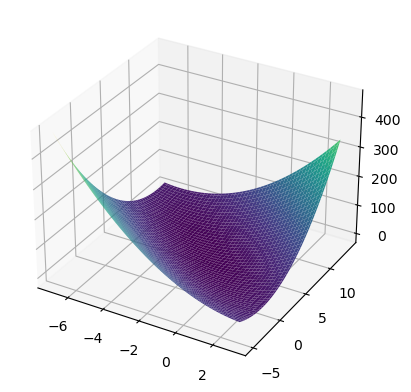

In [12]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.plot_surface(X,Y,Z, cmap = plt.cm.viridis)

Soluzioni:
 [[-2.]
 [ 6.]]
Iterazioni:
 2


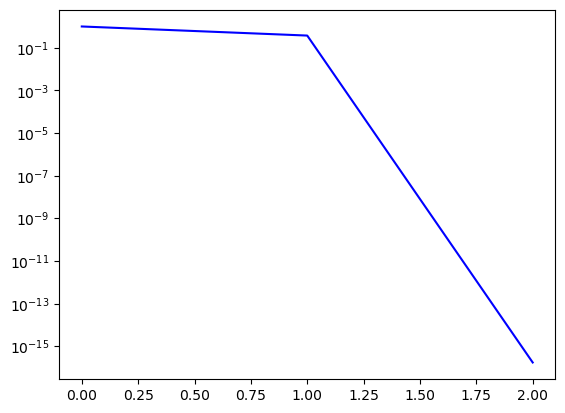

In [17]:
# IMPLEMENTAZIONE SENZA CURVE DI LIVELLO:
xCG, vec_rCG, vec_solCG, itCG = conjugate_gradient(A,b,x0,itmax,tol)
print("Soluzioni:\n", xCG)
print("Iterazioni:\n", itCG)

# Stampo l'andamento delle soluzioni:
plt.semilogy(np.arange(itCG + 1), vec_rCG, 'b')

Soluzioni:
 [[-2.]
 [ 6.]]
Iterazioni:
 2


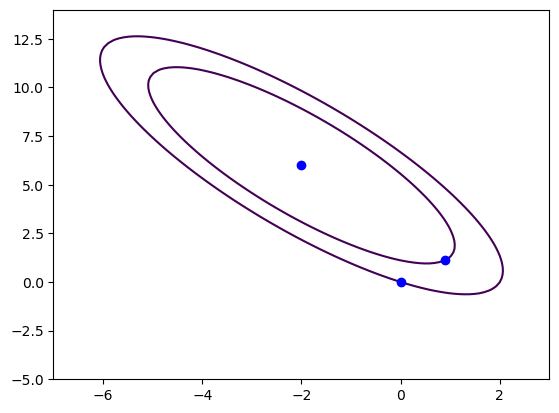

In [19]:
# IMPLEMENTAZIONE CON LE CURVE DI LIVELLO:
xCG, vec_rCG, vec_solCG, itCG = conjugate_gradient_CL(A,b,x0,itmax,tol)
print("Soluzioni:\n", xCG)
print("Iterazioni:\n", itCG)

# ------------------------------------------------------------------------------------------------------------------------

## Esercizio 2-Bis
Implementare la funzione **conjugate_gradient_CL(A,b,x0,itmax,X,Y,Z,tol)** da utilizzare solo nel caso n=2 che visualizza anche le curve di livello e l'iterato x_k

In [18]:
def conjugate_gradient_CL(A,b,x0,itmax,tol):
    
    n,m = A.shape
    if n != m:
        print("La matrice non è quadrata!")
        return None, None, None, None
    
    x = x0
    
    # DISEGNO DELLE CURVE DI LIVELLO AD OGNI ITERAZIONE:
    plt.contour(X,Y,Z, levels = f(x,A,b).flatten())
    plt.plot(x[0],x[1], 'bo')
    
    r_old = A@x - b
    # Il p0 rimane uguale al metodo precedente:
    p = -r_old
    it = 0
    nb = np.linalg.norm(b)
    criterio_arresto = np.linalg.norm(r_old)/nb
    
    # Memorizziamo tutti gli r che calcoliamo:
    vec_r = []
    vec_r.append(criterio_arresto)
    
    # Memorizziamo i vettori soluzione di ogni iterazione:
    vec_sol = []
    vec_sol.append(x)
    
    # Parte ciclica del metodo:
    while criterio_arresto >= tol and it < itmax:
        it = it + 1
        # variabile di appoggio per calcolare il prodotto A*p:
        Ap = A@p
        # Calcolo il numeratore della formula per calcolare alfa:
        numeratore_alfa = -r_old.T@p
        alfa = numeratore_alfa/(p.T@Ap)
        x = x + alfa*p
        
        # DISEGNO DELLE CURVE DI LIVELLO AD OGNI ITERAZIONE:
        plt.contour(X,Y,Z, levels = f(x,A,b).flatten())
        plt.plot(x[0],x[1], 'bo')
        
        vec_sol.append(x)
        
        r = r_old + alfa*Ap
        criterio_arresto = np.linalg.norm(r)/nb
        
        vec_r.append(criterio_arresto)
        
        numeratore_gamma = r.T@r
        denominatore_gamma = r_old.T@r_old
        gamma = numeratore_gamma/denominatore_gamma
        p = -r + gamma*p
        r_old = r
        
    return x, vec_r, vec_sol, it

# ------------------------------------------------------------------------------------------------------------------------

## Test didattici per il caso n=2, visualizzando le curve di livello

1) Risolvere il sistema lineare Ax=b, dove A=np.array([[8,4],[4,3]]) e b=np.array([8,10]), utilizzando il metodo del gradiente e del gradiente coniugato con la visualizzazione grafica delle curve di livello e della soluzione ad ogni iterazione. 
2) Si selezioni l'iterato iniziale x0=[0,0], itmax=200, tol=1e-10. 
3) Si confrontino le iterazioni effettuate da ciascuno dei due metodi e si visualizzi  $ \frac{||r^{(k)}||_2} {||b||_2}$ ad ogni iterazione.

# ------------------------------------------------------------------------------------------------------------------------

# Esercizio 3
Scrivere una funzione creaPoisson(n) che preso in input l'ordine della matrice quadrata di Poisson la costruzione secondo la seguente formula:

$$A =
\left [
\begin{array}{ccccccccccc}
4 & -1 & 0 & -1 &0 &0 & 0& 0& \cdots &   0 & 0\\
-1 & 4 & -1 & 0  &-1 &0 & 0& 0& \cdots &   0 & 0\\
0 & -1 & 4 & -1  &0 &-1 & 0& 0& \cdots &   0 & 0 \\
-1 & 0 & -1 & 4  &-1 &0  & -1 & 0& \cdots &   0 & 0\\
0 & -1 & 0 & -1  & 4 &-1 & 0 & -1& \cdots &   0 & 0\\
0 & 0 & -1 & 0  & -1 &4 & -1 & 0&  -1 & 0 & 0 \\
0 & 0 & 0 & \ddots  & 0 &\ddots & \ddots & \ddots& \ddots & \ddots & 0\\
0 & 0 & 0 & 0  & -1 &0  & -1 & 4& -1 &   0& -1\\
\end{array}
 \right ], \qquad
$$

- Risolvere il sistema lineare Ax=b con matrice dei coefficienti A di Poisson con ordine che va da 10 a 100 con step 2,  e termine noto b scelto in maniera tale che il sistema abbia soluzione il vettore x con tutte le componenti  uguali ad 1, utilizzando  il metodo iterativo del gradiente e del gradiente coniugato  

In [65]:
def creaPoisson(n):
    A = (np.eye(n)*4)
    # nuove_colonne = np.zeros((n, 3))
    # nuove_colonne[n-3] = np.array([-1, 0, 0])
    # nuove_colonne[n-2] = np.array([0, -1, 0])
    # nuove_colonne[n-1] = np.array([-1, 0, -1])    
    k_vet = np.array([-3, -1, 1, 3])
    for ki in k_vet:
        A = A - np.eye(n, k=ki)
    # A = np.hstack((A, nuove_colonne))
    
    return A

In [79]:
# L'ordine della matrice di Poisson deve variare da 10 a 100 con passo 2:
n_vet = np.arange(10,101,2)

for n in n_vet:
    A = creaPoisson(n)
    b = np.sum(A, axis = 1).reshape(A.shape[0], 1)
    x0 = np.zeros_like(b)
    itmax = 9000
    tol = 1e-10
    
    xG, vec_rG, vec_solG, itG = steepestDescent(A,b,x0,itmax,tol)
    # print("Soluzione con Steepest Descent:\n", xG)
    xGC, vec_rGC, vec_solGC, itGC = conjugate_gradient(A,b,x0,itmax,tol)
    # print("Soluzione con Conjugate Gradient:\n", xGC)
    print("Numero iterazioni:\n", itG, "(Deepest Descent)", itGC, "(Conjugate Gradient)")

Numero iterazioni:
 106 (Deepest Descent) 5 (Conjugate Gradient)
Numero iterazioni:
 154 (Deepest Descent) 5 (Conjugate Gradient)
Numero iterazioni:
 204 (Deepest Descent) 6 (Conjugate Gradient)
Numero iterazioni:
 266 (Deepest Descent) 8 (Conjugate Gradient)
Numero iterazioni:
 334 (Deepest Descent) 9 (Conjugate Gradient)
Numero iterazioni:
 406 (Deepest Descent) 9 (Conjugate Gradient)
Numero iterazioni:
 486 (Deepest Descent) 10 (Conjugate Gradient)
Numero iterazioni:
 572 (Deepest Descent) 12 (Conjugate Gradient)
Numero iterazioni:
 664 (Deepest Descent) 11 (Conjugate Gradient)
Numero iterazioni:
 764 (Deepest Descent) 11 (Conjugate Gradient)
Numero iterazioni:
 868 (Deepest Descent) 14 (Conjugate Gradient)
Numero iterazioni:
 980 (Deepest Descent) 16 (Conjugate Gradient)
Numero iterazioni:
 1096 (Deepest Descent) 17 (Conjugate Gradient)
Numero iterazioni:
 1220 (Deepest Descent) 17 (Conjugate Gradient)
Numero iterazioni:
 1350 (Deepest Descent) 18 (Conjugate Gradient)
Numero iteraz

# ------------------------------------------------------------------------------------------------------------------------

# Esercizio 4
Consideriamo il sistema lineare Ax=b  dov A è  la matrice di Hilbert di dimensione 5, costruita usando la funzione hilbert(n) di scipy.linalg (A=scipy.linalg.hilbert(5)) in modo tale che la soluzione esatta sia $x = (1, 1, . . . , 1)^T$ .
Risolvere il sistema lineare usando sia il metodi del gradiente che il metodo del gradiente coniugato e confrontarne gli errori ad ogni iterazione.

In [82]:
import scipy.linalg as spl

Numero iterazioni:
 9000 (Deepest Descent) 7 (Conjugate Gradient)


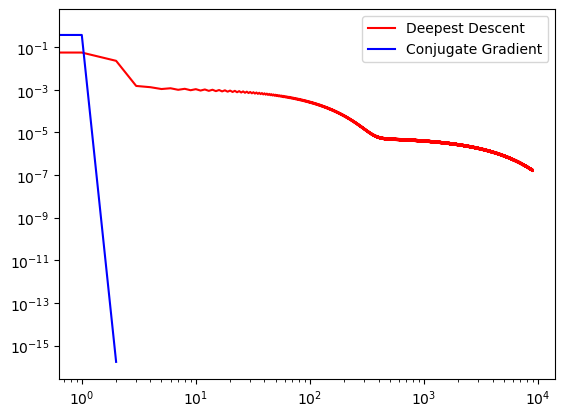

In [93]:
A = spl.hilbert(5)
b = np.sum(A, axis = 1).reshape(A.shape[0], 1)
x0 = np.zeros_like(b)
itmax = 9000
tol = 1e-10
    
xG, vec_rG, vec_solG, itG = steepestDescent(A,b,x0,itmax,tol)
# print("Soluzione con Steepest Descent:\n", xG)
xGC, vec_rGC, vec_solGC, itGC = conjugate_gradient(A,b,x0,itmax,tol)
# print("Soluzione con Conjugate Gradient:\n", xGC)
print("Numero iterazioni:\n", itG, "(Deepest Descent)", itGC, "(Conjugate Gradient)")

plt.loglog(np.arange(itG + 1), vec_rG, 'r')
plt.loglog(np.arange(itCG + 1), vec_rCG, 'b')
plt.legend(("Deepest Descent", "Conjugate Gradient"))

# ------------------------------------------------------------------------------------------------------------------------

## Esercizio 5
Importare il file creaG ed utilizzare le funzioni sottospecificate per creare, scelto $n$,  una matrice D di ordine $m=(n-2)^2$

*import creaG*

*G = creaG.numgrid(n)*

*D = creaG.delsq(G).todense().getA()*

Risolvere il sistema lineare Dx=b, con matrice G di ordine m=16 ed ordine m=400, (scegliere n in maniera opportuna), usando i metodi del gradiente e del gradiente coniugato. Confrontare gli errori su uno stesso grafico e giustifcare i risultati alla luce del risultato teorico della maggiorazione dell'errore per entrambi i metodi

In [95]:
from creaG import *

[[ 4. -1.  0.  0. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [-1.  4. -1.  0.  0. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. -1.  4. -1.  0.  0. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. -1.  4.  0.  0.  0. -1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [-1.  0.  0.  0.  4. -1.  0.  0. -1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. -1.  0.  0. -1.  4. -1.  0.  0. -1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. -1.  0.  0. -1.  4. -1.  0.  0. -1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. -1.  0.  0. -1.  4.  0.  0.  0. -1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. -1.  0.  0.  0.  4. -1.  0.  0. -1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. -1.  0.  0. -1.  4. -1.  0.  0. -1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0. -1.  0.  0. -1.  4. -1.  0.  0. -1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. -1.  0.  0. -1.  4.  0.  0.  0. -1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. -1.  0.  0.  0.  4. -1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  0.  0. -1.  4. -1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  0.  0. -1.  4. 

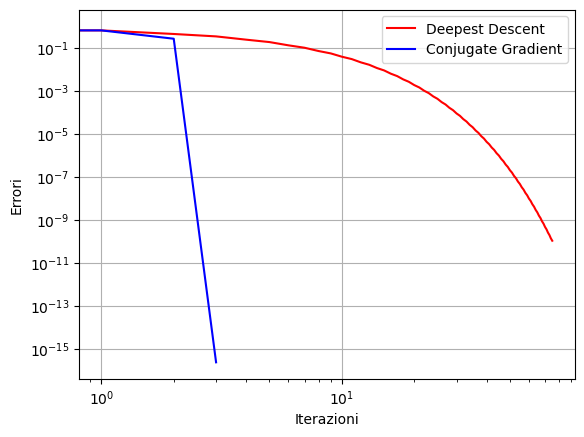

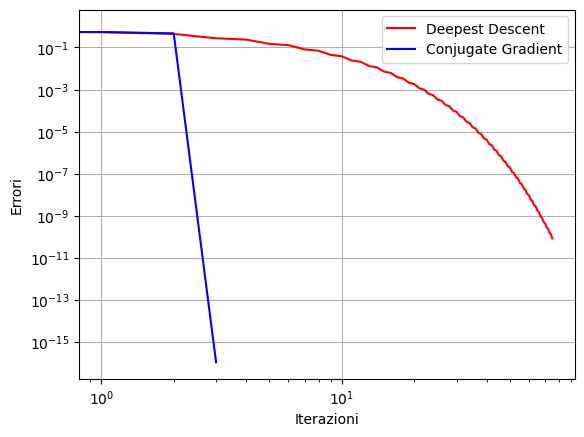

[[ 4. -1.  0. ...  0.  0.  0.]
 [-1.  4. -1. ...  0.  0.  0.]
 [ 0. -1.  4. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  4. -1.  0.]
 [ 0.  0.  0. ... -1.  4. -1.]
 [ 0.  0.  0. ...  0. -1.  4.]]
Numero iterazioni:
 1824 (Deepest Descent) 41 (Conjugate Gradient)


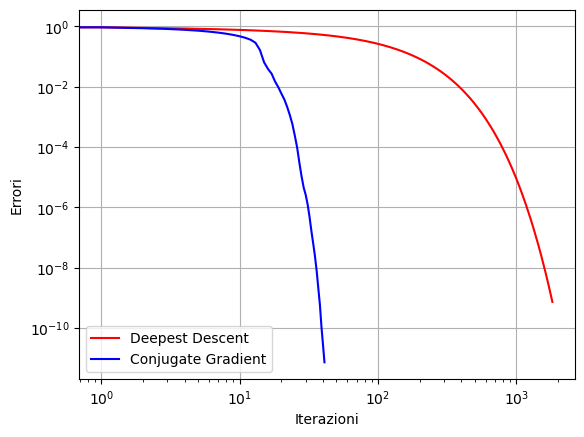

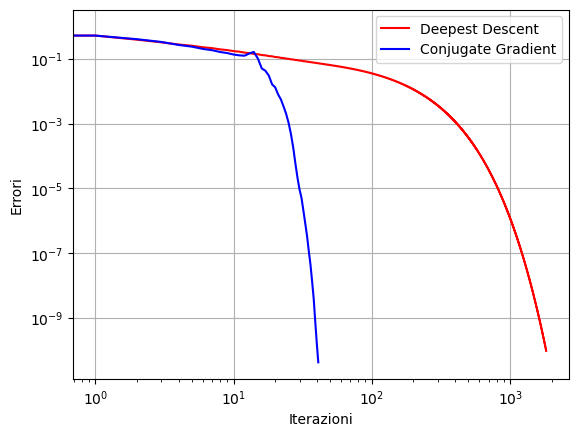

In [189]:
n_vet = np.array([6,22])
for n in n_vet:
    
    # Costruzione della matrice D:
    G = numgrid(n)
    D = delsq(G).todense().getA()
    print(D)
    
    # Definizione degli altri elementi utili all'algoritmo:
    b = np.sum(D, axis = 1).reshape(D.shape[0], 1)
    x0 = np.zeros_like(b)
    itmax = 2000
    tol = 1e-10

    # Risoluzione del sistema con matrice D, utilizzando i due metodi previsti:
    xG, vec_rG, vec_solG, itG = steepestDescent(D,b,x0,itmax,tol)
    # print("Soluzione con Steepest Descent:\n", xG)
    xGC, vec_rGC, vec_solGC, itGC = conjugate_gradient(D,b,x0,itmax,tol)
    # print("Soluzione con Conjugate Gradient:\n", xGC)
    print("Numero iterazioni:\n", itG, "(Deepest Descent)", itGC, "(Conjugate Gradient)")

    vec_errG = []
    for sol in vec_solG:
        err = np.linalg.norm(sol - np.linalg.solve(D, b))/np.linalg.norm(np.linalg.solve(D, b))
        vec_errG.append(err)
    
    vec_errGC = []
    for sol in vec_solGC:
        err = np.linalg.norm(sol - np.linalg.solve(D, b))/np.linalg.norm(np.linalg.solve(D, b))
        vec_errGC.append(err)
    
    # Visualizzazione sul grafico degli errori:
    plt.loglog(np.arange(itG + 1), vec_errG, 'r')
    plt.loglog(np.arange(itGC + 1), vec_errGC, 'b')
    plt.grid(True)
    plt.legend(("Deepest Descent", "Conjugate Gradient"))
    plt.xlabel("Iterazioni")
    plt.ylabel("Errori")
    plt.show()
    
    # Visualizzazione sul grafico delle condizioni di arresto:
    plt.loglog(np.arange(itG + 1), vec_rG, 'r')
    plt.loglog(np.arange(itGC + 1), vec_rGC, 'b')
    plt.grid(True)
    plt.legend(("Deepest Descent", "Conjugate Gradient"))
    plt.xlabel("Iterazioni")
    plt.ylabel("Errori")
    plt.show()
    

In [187]:
# Per quanto riguarda il METODO DEL GRADIENTE, l'errore dipende dal condizionamento della matrice D elevato alla k (con k uguale alle iterazioni necessarie)
# Per quanto riguarda il METODO DEL GRADIENTE CONIUGATO, l'errore dipende dalla radice del condizionamento della matrice D (perciò ecco spiegato il perchè di un errore minore)